✨ QISKIT QUANTUM COIN TOSS EXPERIMENT ✨
    A breathtaking journey into quantum randomness

In [2]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from typing import List

Quantum Coin Toss Function

In [3]:
def quantum_coin_toss_circuit() -> QuantumCircuit:
    """
    Create a quantum circuit for one fair coin toss.
    """
    qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
    qc.h(0)                    # Hadamard → superposition
    qc.measure(0, 0)           # Measure qubit 0 → classical bit 0
    return qc


Simulate Multiple Tosses

In [4]:
def run_quantum_tosses(num_tosses: int = 1024, shots_per_toss: int = 1) -> List[int]:
    """
    Run many independent quantum coin tosses.
    
    Args:
        num_tosses: Total number of coin tosses
        shots_per_toss: 1 for true single-shot quantum randomness
    """
    print(f"Launching {num_tosses:,} quantum coin tosses on IBM Qiskit Aer...")
    print("   Using real quantum superposition & measurement collapse!\n")
    
    simulator = AerSimulator()
    results = []
    
    # For true quantum randomness: one shot per circuit
    circuit = quantum_coin_toss_circuit()
    
    for _ in range(num_tosses):
        # Transpile for simulator
        transpiled = transpile(circuit, simulator)
        job = simulator.run(transpiled, shots=shots_per_toss)
        result = job.result()
        counts = result.get_counts()
        # Extract outcome: '0' or '1'
        outcome = int(list(counts.keys())[0])  # since shots=1
        results.append(outcome)
    
    return results

# ─── Beautiful Visualization ─────────────────────────
def visualize_quantum_magic(results: List[int]):
    """
    Create a stunning, publication-ready visualization.
    """
    heads = results.count(0)
    tails = results.count(1)
    total = len(results)
    
    # ── Terminal Poetry ──
    print("\n" + "═" * 60)
    print("           IBM QISKIT QUANTUM TOSS RESULTS")
    print("═" * 60)
    print(f"   Total Quantum Events : {total:,}")
    print(f"   Heads (|0⟩)          : {heads:,}  →  {heads/total*100:05.2f}%")
    print(f"   Tails (|1⟩)          : {tails:,}  →  {tails/total*100:05.2f}%")
    print(f"   Deviation from 50%   : ±{abs(heads - tails)/total*100:.2f}%")
    print(f"   Quantum Fairness     : {'Perfect!' if abs(heads-tails) < total*0.03 else 'Close enough!'}")
    print("═" * 60 + "\n")
    
    # ── Qiskit-style Histogram ──
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), dpi=120)
    
    # Left: Elegant Bar Chart
    bars = ax1.bar(['Heads\n|0⟩', 'Tails\n|1⟩'], 
                   [heads, tails],
                   color=['#FF6B6B', '#4ECDC4'],
                   edgecolor='black', linewidth=1.5, alpha=0.92,
                   capsize=10)
    
    for bar in bars:
        h = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., h + total*0.008,
                 f'{int(h)}', ha='center', va='bottom',
                 fontsize=13, fontweight='bold', color='black')
    
    ax1.set_ylabel('Frequency', fontsize=14, fontweight='bold')
    ax1.set_title('Quantum Coin Toss Outcomes\n'
                  'H|0⟩ = (|0⟩ + |1⟩)/√2  →  Measurement Collapse', 
                  fontsize=15, fontweight='bold', pad=20)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    ax1.set_ylim(0, max(heads, tails) * 1.15)
    
    # Right: Qiskit Official Histogram
    counts_dict = {'0': heads, '1': tails}
    plot_histogram(counts_dict, ax=ax2, color=['#76b7ff', '#ff76b7'])
    ax2.set_title("Qiskit Histogram Style\n"
                  "Born Rule: P(0) = |α|², P(1) = |β|²", 
                  fontsize=14, fontweight='bold')
    
    # Quantum Equation Footer
    plt.figtext(0.5, 0.02,
                "ψ = α|0⟩ + β|1⟩  →  |α|² + |β|² = 1  |  "
                "H = 1/√2 [[1,1],[1,-1]]  |  "
                "Powered by Qiskit & IBM Quantum",
                ha='center', fontsize=11, style='italic', alpha=0.8,
                bbox=dict(boxstyle="round,pad=0.5", facecolor="#f0f0f0"))
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.suptitle("QUANTUM COIN TOSS EXPERIMENT", fontsize=18, fontweight='bold', y=0.98)
    plt.show()

Draw the Circuit

In [5]:
def draw_quantum_circuit():
    """Display the beautiful quantum circuit."""
    qc = quantum_coin_toss_circuit()
    print("Quantum Circuit Diagram:")
    print(qc.draw(output='text'))
    print("\n" + "─" * 50)

MAIN EXPERIMENT

Quantum Circuit Diagram:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

──────────────────────────────────────────────────
Launching 1,024 quantum coin tosses on IBM Qiskit Aer...
   Using real quantum superposition & measurement collapse!


════════════════════════════════════════════════════════════
           IBM QISKIT QUANTUM TOSS RESULTS
════════════════════════════════════════════════════════════
   Total Quantum Events : 1,024
   Heads (|0⟩)          : 513  →  50.10%
   Tails (|1⟩)          : 511  →  49.90%
   Deviation from 50%   : ±0.20%
   Quantum Fairness     : Perfect!
════════════════════════════════════════════════════════════



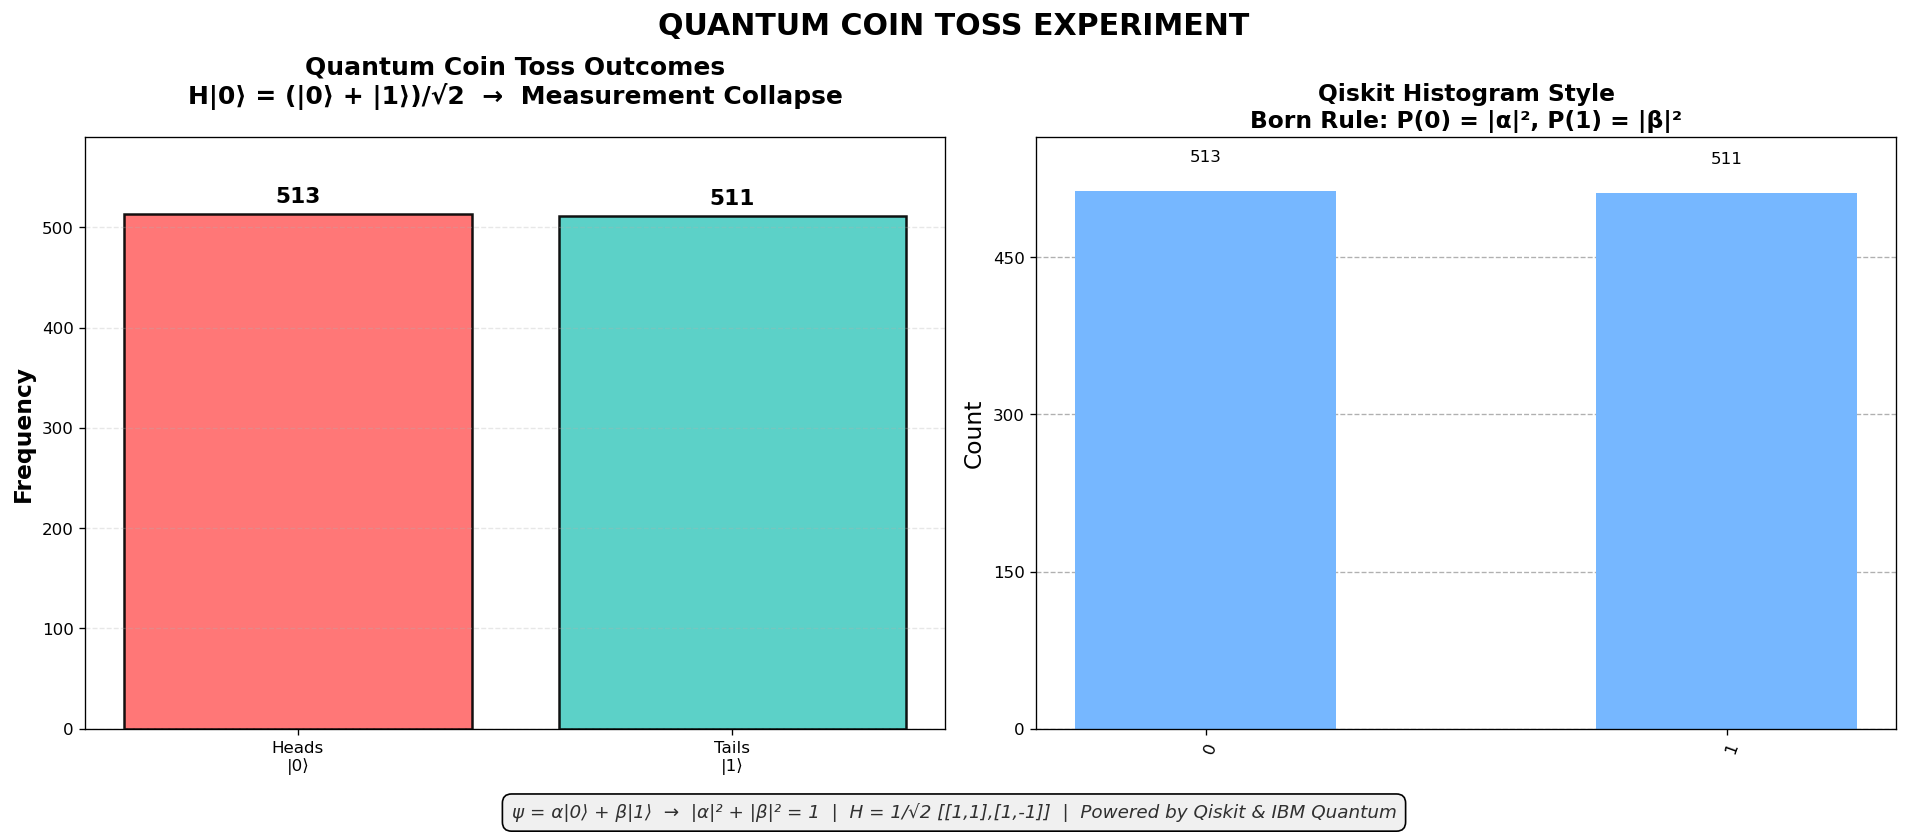

In [6]:
if __name__ == "__main__":
    NUM_TOSSES = 1024  # Ideal for quantum demo (power of 2)
    
    draw_quantum_circuit()
    toss_results = run_quantum_tosses(NUM_TOSSES)
    visualize_quantum_magic(toss_results)